In [1]:
#!pip install keras
#!pip install -U scikit-learn
#!pip install pillow
#!pip install matplotlib
#!pip install jupyternotify
%load_ext jupyternotify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 20.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 5.8 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 16.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for jupyternotify: filename=jupyternotify-0.1.15-py3-none-any.whl size=8724 sha256=518472b65374928b8b468d0329a62b114eb460315a529a2c65386b83f53fddd9
  Stored in directory: /root/.cache/pip/wheels/2d/ff/e5/bced088d6443a70f72ee86f9e46f11056c981100c2d3cfadfb
Suc

<IPython.core.display.Javascript object>

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

2023-04-11 07:51:04.858579: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
"""
Notes for tmrw

u reduced batch size to 16 and u saw some improvements still plateuing
now ur pissed off coz accuracy is not increasing even though u put 0 data augmentation
tmrw I have to look into that"""

'\nNotes for tmrw\n\nu reduced batch size to 16 and u saw some improvements still plateuing\nnow ur pissed off coz accuracy is not increasing even though u put 0 data augmentation\ntmrw I have to look into that'

## Variables Being Used

In [6]:
#variables being used
batch_size=16
#val_split=0.2 #20 percent validation
image_size=256
image_shape=(image_size,image_size)
#file_directory='/root/DR no aug'
#file_directory='/root/01DR_noDR'
train_file_directory='/root/DR-detection-using-OCT-A/train_val_with_CLAHE/Training'
validation_file_directory='/root/DR-detection-using-OCT-A/train_val_with_CLAHE/Validation'
alt_train_file_directory='/root/DR-detection-using-OCT-A/train_val_split/Training_no_weights'

In [7]:
!nvidia-smi

Tue Apr 11 07:51:55 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090         On | 00000000:0B:00.0 Off |                  Off |
|  0%   47C    P8               17W / 450W|      1MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Importing Datasets

In [54]:

from keras.applications.vgg16 import preprocess_input #for that vgg16
#import tensorflow as tf

#from keras.applications.Xception import preprocess_input

training_datagen = ImageDataGenerator( 
        preprocessing_function=preprocess_input, # use this only when using VGG16
        #rescale=1./255,
        rotation_range=40,#can change this
        shear_range=0.2,#can change this
        zoom_range=0.1, #can change this
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect',# constant,reflect,wrap,
        )

validation_datagen=ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #rescale=1./255    
        )

#Creating our generators, no need of changing values here
train_generator = training_datagen.flow_from_directory( #Creating our training generator 
        train_file_directory,  
        target_size=image_shape,
        batch_size=batch_size,
        #color_mode='grayscale',
        class_mode='categorical',
        shuffle = False,
        )

validation_generator = validation_datagen.flow_from_directory( #Creating our validation generator
        validation_file_directory, 
        target_size=image_shape, 
        batch_size=batch_size,
        #color_mode='grayscale',
        class_mode='categorical',
        shuffle = False,
)

Found 550 images belonging to 3 classes.
Found 61 images belonging to 3 classes.


## Displaying Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


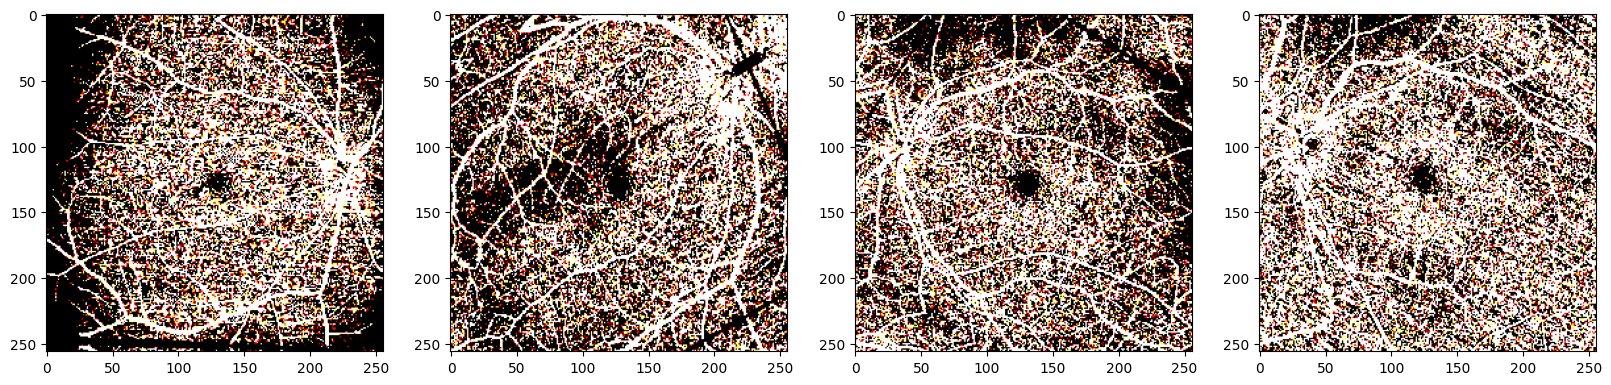

In [55]:
# Enable/Disable to see 4 random images
fig, axs=plt.subplots(ncols=4, figsize=(20,20))
for i in range(4):
    axs[i].imshow(train_generator[i][0][0],cmap='gray',vmin=0,vmax=255)

## Creating weights

In [10]:
import numpy as np ## Calculating the class weights
from sklearn.utils.class_weight import compute_class_weight

class_weighing = compute_class_weight(class_weight='balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights=dict(zip(np.unique(train_generator.classes), class_weighing))

print(class_weights)

{0: 0.6193693693693694, 1: 0.9598603839441536, 2: 2.9100529100529102}


## Creating Model

In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D
from keras.optimizers import SGD
import keras

In [15]:
base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(image_size, image_size, 3),
    include_top=False)

base_model.trainable = False
inputs = keras.Input(shape=(image_size, image_size, 3))

#for layer in base_model.layers[:15]:
#   layer.trainable = False
#for layer in base_model.layers[15:]:
#   layer.trainable = True

x = base_model(inputs)
x=keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(x)
x=keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(x)
x=keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(x)
x = keras.layers.GlobalAveragePooling2D()(x)

#x = keras.layers.Dropout(0.15)(x)  # Regularize with dropout
x=keras.layers.Dense(750,activation="relu")(x)
x=keras.layers.Dense(500,activation="relu")(x)
x=keras.layers.Dense(250,activation="relu")(x)
outputs = keras.layers.Dense(3,activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


model.summary(expand_nested=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| input_5 (InputLayer)      [(None, 256, 256, 3)]     0         |
|                                                               |
| block1_conv1 (Conv2D)     (None, 256, 256, 64)      1792      |
|                                                               |
| block1_conv2 (Conv2D)     (None, 256, 256, 64)      36928     |
|                                                               |
| block1_pool (MaxPooling2D)  (None, 128, 128, 64)    0         |
|                                                               |
| block2_conv1 (Conv2D)     (None, 128, 128, 128)     73856  

### Compile

In [50]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.00001), #SGD or adam
              loss='categorical_crossentropy' ,
              metrics=['categorical_accuracy','accuracy'])

### Generating Callbacks

In [56]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath="/root/DR-detection-using-OCT-A/saved_models/VGG+conv2D_{categorical_accuracy:.2f}_{epoch:02d}.hdf5"

checkpoint= ModelCheckpoint(filepath,monitor='val_categorical_accuracy',verbose=1,save_best_only=True,mode='max')
early_stop=EarlyStopping(monitor='categorical_accuracy',patience=120,verbose=0) #only change patience

callback_list=[checkpoint,early_stop]#add the callbacks used

### Model.Fit()

In [57]:
%%notify
history=model.fit(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//batch_size,
        verbose=1, 
        epochs=300,  #change this
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//batch_size,
        callbacks=callback_list,
        #class_weight=class_weights
)
print("Done bro")

Epoch 1/300


2023-04-11 10:34:30.125914: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


34/34 [==============================] - ETA: 0s - loss: 0.6150 - categorical_accuracy: 0.7341

2023-04-11 10:34:37.814119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_categorical_accuracy improved from -inf to 0.66667, saving model to /root/DR-detection-using-OCT-A/saved_models/VGG+conv2D_0.73_01.hdf5
34/34 [==============================] - 8s 242ms/step - loss: 0.6150 - categorical_accuracy: 0.7341 - val_loss: 1.2763 - val_categorical_accuracy: 0.6667
Epoch 2/300
34/34 [==============================] - ETA: 0s - loss: 0.6373 - categorical_accuracy: 0.7397
Epoch 2: val_categorical_accuracy improved from 0.66667 to 0.70833, saving model to /root/DR-detection-using-OCT-A/saved_models/VGG+conv2D_0.74_02.hdf5
34/34 [==============================] - 8s 239ms/step - loss: 0.6373 - categorical_accuracy: 0.7397 - val_loss: 1.0422 - val_categorical_accuracy: 0.7083
Epoch 3/300
34/34 [==============================] - ETA: 0s - loss: 0.5676 - categorical_accuracy: 0.7360
Epoch 3: val_categorical_accuracy did not improve from 0.70833
34/34 [==============================] - 8s 233ms/step - loss: 0.5676 - categorical_accuracy: 0.7360 - val_loss

<IPython.core.display.Javascript object>

### Curves

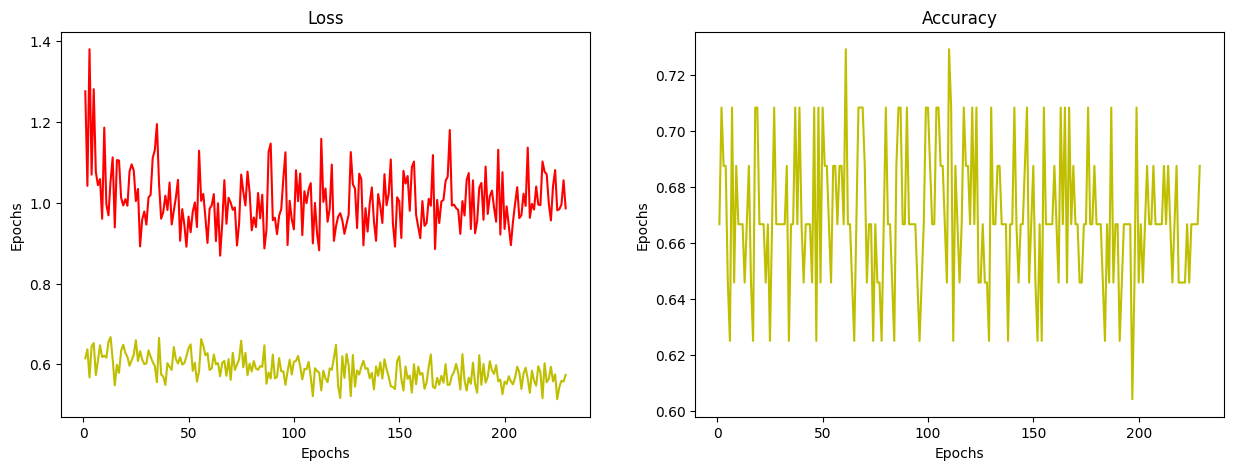

In [58]:
#loss curve
fig, axs=plt.subplots(ncols=2,figsize=(15, 5))#, figsize=(20,20))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
axs[0].plot(epochs, loss, 'y', label='Training loss')
axs[0].plot(epochs, val_loss, 'r', label='Validation loss')
axs[0].set(title='Loss', xlabel='Epochs', ylabel='Epochs');

#accuracy curve
acc = history.history['val_categorical_accuracy']
#val_acc = history.history['val_accuracy']
axs[1].plot(epochs, acc, 'y', label='Training acc')
#axs[1].plot(epochs, val_acc, 'r', label='Validation acc')
axs[1].set(title='Accuracy', xlabel='Epochs', ylabel='Epochs');

In [ ]:
"""prediction_classes = np.array([])
true_classes =  np.array([])
i=0
for x, y in validation_generator:
    if i==len(validation_generator.classes):
        break    
    i=i+1
    prediction_classes = np.concatenate([prediction_classes,np.argmax(model.predict(x,verbose=0), axis = -1)])
    true_classes = np.concatenate([true_classes, np.argmax(y, axis=-1)])
print(classification_report(true_classes, prediction_classes))"""

In [41]:
model.save('VGG+conv2d(600).h5')
#continue_model=load_model('to_continue.h5')

## Evaluating Model

In [42]:
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

#model = load_model('/root/44-0.82.hdf5')

In [46]:
new_model=load_model("/root/DR-detection-using-OCT-A/saved_models/VGG+conv2D_0.71_02.hdf5")

/tmp/ipykernel_542/1844738341.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  results=model_eval.evaluate_generator(data_eval, steps=len(data_eval.classes)//batch_size)
2023-04-11 10:23:05.628948: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Loss and accuracy are [1.1169013977050781, 0.6458333134651184]


/tmp/ipykernel_542/1844738341.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model_eval.predict_generator(data_eval, steps=len(data_eval.classes)//batch_size+1)
2023-04-11 10:23:06.279769: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Confusion Matrix


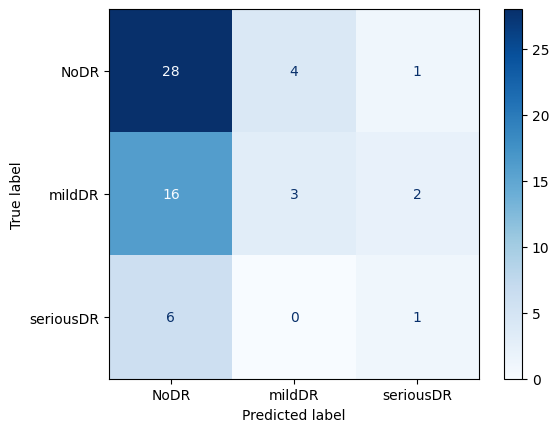

Classification Report
              precision    recall  f1-score   support

        NoDR       0.56      0.85      0.67        33
      mildDR       0.43      0.14      0.21        21
   seriousDR       0.25      0.14      0.18         7

    accuracy                           0.52        61
   macro avg       0.41      0.38      0.36        61
weighted avg       0.48      0.52      0.46        61



In [47]:
data_eval=validation_generator
model_eval=model
results=model_eval.evaluate_generator(data_eval, steps=len(data_eval.classes)//batch_size)
print("Loss and accuracy are", results)
Y_pred = model_eval.predict_generator(data_eval, steps=len(data_eval.classes)//batch_size+1)
#print(train_generator.classes)
y_pred = np.argmax(Y_pred, axis=1)
#print(train_generator.classes)
#print(y_pred)
#print(X)
        
print('Confusion Matrix')
cm=confusion_matrix(data_eval.classes,y_pred)
target_names = ['NoDR', 'mildDR','seriousDR']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print('Classification Report')

print(classification_report(data_eval.classes,y_pred, target_names=target_names))

In [48]:
Y_pred

array([[0.9898662 , 0.27588066, 0.00336444],
       [0.9912149 , 0.26452214, 0.00216905],
       [0.6584868 , 0.2540528 , 0.22639668],
       [0.9836791 , 0.29300404, 0.00630401],
       [0.96978563, 0.54745597, 0.00316108],
       [0.98646855, 0.29845044, 0.00379772],
       [0.98741156, 0.18620439, 0.00755109],
       [0.9817493 , 0.28153136, 0.00741147],
       [0.9786773 , 0.19170746, 0.00996534],
       [0.97110075, 0.1977442 , 0.020455  ],
       [0.9202031 , 0.16700123, 0.05566701],
       [0.49891067, 0.6747045 , 0.15959486],
       [0.9761706 , 0.2937445 , 0.00733852],
       [0.9789498 , 0.3049199 , 0.0075754 ],
       [0.53548276, 0.8002319 , 0.13919075],
       [0.79798377, 0.71616   , 0.02881274],
       [0.46134943, 0.12588505, 0.6522231 ],
       [0.24667881, 0.48331347, 0.40724584],
       [0.5426812 , 0.71411914, 0.18482363],
       [0.98097354, 0.33462554, 0.00664729],
       [0.9555042 , 0.17140353, 0.03675746],
       [0.99086165, 0.38488242, 0.00276958],
       [0.

In [61]:
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [62]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2], dtype=int32)